In [21]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
%%time
df_Transact1=pd.read_csv('./Customer_Transaction_Data.csv')


df_Transact=df_Transact1[df_Transact1['SaleValue']>0]
print("The Shape of the dataframe is",df_Transact.shape,".")


The Shape of the dataframe is (1432124, 16) .
CPU times: user 2.63 s, sys: 338 ms, total: 2.97 s
Wall time: 2.98 s


Let us go through each column to clean them.

In [6]:
df_Transact.isna().sum()

CustID                            0
ItemDesc                       8610
MerchCategoryDescription       8610
MerchClassDescription         11801
MerchGroupDescription         11801
SaleValue                         0
OrderedQuantity                   0
OrderDate                         0
ReturnFlag                  1432111
SalesChannelCode                  0
Ecom_BnM_Indicator                0
StoreID                          19
StoreCode                         0
StoreCity                    107313
StoreState                   158384
StorePincode                 158384
dtype: int64

The description columns are having nulls, however still those rows contain the sale values hence keeping those.

In [7]:
sorted(list(df_Transact['SaleValue'].unique()))
# All values are non negative #No dump values

[0.0102,
 0.0204,
 0.0306,
 0.0408,
 0.051,
 0.0612,
 0.0714,
 0.0816,
 0.0918,
 0.102,
 0.1122,
 0.1224,
 0.1326,
 0.1428,
 0.153,
 0.1632,
 0.1734,
 0.1836,
 0.1938,
 0.204,
 0.2142,
 0.2244,
 0.2346,
 0.255,
 0.2652,
 0.2754,
 0.2856,
 0.306,
 0.3366,
 0.3468,
 0.357,
 0.3672,
 0.3774,
 0.408,
 0.4182,
 0.4589999999999999,
 0.4896,
 0.51,
 0.5202,
 0.612,
 0.7140000000000001,
 0.7956000000000001,
 0.8160000000000001,
 0.8363999999999999,
 0.8466,
 0.8568,
 0.867,
 0.9078,
 0.918,
 0.9282,
 0.9384,
 0.9588,
 0.969,
 0.9792,
 0.9894,
 0.9996,
 1.0098,
 1.02,
 1.0302,
 1.0404,
 1.122,
 1.2036,
 1.224,
 1.2546,
 1.4280000000000002,
 1.53,
 1.5504,
 1.5810000000000002,
 1.734,
 1.9278,
 1.938,
 2.0094,
 2.04,
 2.0502,
 2.0808,
 2.397,
 2.4582,
 2.5398,
 2.6418,
 2.7030000000000003,
 2.7540000000000004,
 2.8152,
 2.8560000000000003,
 2.8764,
 2.907,
 2.958,
 2.9784,
 3.06,
 3.672,
 3.876,
 3.9576,
 4.0698,
 4.08,
 4.691999999999998,
 4.7328,
 4.865399999999998,
 4.9674000000000005,
 5.1,


In [14]:
df_Transact[df_Transact['OrderedQuantity']<0]
#Has negative values 
#Let us check if these are the returned items


,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
2641,F11AFoj11jAVeJFoEGMoAVMtoGF8MH88,Trade In Washing Machines-POS,Trade In Washing Machines-POS,Other Charges,Charge,612.0,-1,2019-10-02,NaN,RS,B&M,8.0,A010,Surat,Gujarat,395007
5091,Ze1q1e177eeGt7A,Trade In Refrigerators-POS,Trade In Refrigerators-POS,Other Charges,Charge,816.0,-1,2020-03-13,NaN,RS,B&M,151.0,A202,Vadodara,Gujarat,390008
63295,RMHGE1oo1eE88G1eEHVe1EMtetReG18M,Trade In Refrigerators-POS,Trade In Refrigerators-POS,Other Charges,Charge,1836.0,-1,2021-05-28,NaN,RS,B&M,71.0,A114,Bangalore,Karnataka,560035
64203,7JGo8HtHA8tFFEeeMeRHMJHFRVo7FF1e,Trade In Refrigerators-POS,Trade In Refrigerators-POS,Other Charges,Charge,1020.0,-1,2021-06-20,NaN,RS,B&M,661.0,A330,Ratlam,Madhya Pradesh,457001
64589,VMHGFejEEFERMGtEFMV8j8MGHjMtMje8,Trade In Refrigerators-POS,Trade In Refrigerators-POS,Other Charges,Charge,1020.0,-1,2021-07-01,NaN,RS,B&M,644.0,A328,Ahmedabad,Gujarat,382424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608755,jA7EJ1VVoHjRMeEE1Gt71G1FV1M1eGGe,Trade In Refrigerators-POS,Trade In Refrigerators-POS,Other Charges,Charge,1530.0,-1,2021-12-20,NaN,RS,B&M,100.0,A147,Mumbai,Maharashtra,400092
1609089,HJFJ8HtGF7FEt7JFGVGMt1EHAFHJJooF,Trade In Washing Machines-POS,Trade In Washing Machines-POS,Other Charges,Charge,1020.0,-1,2021-12-28,NaN,RS,B&M,137.0,A186,Indore,Madhya Pradesh,452010
1609380,7FH1Go78FFGEAHVVoGGt1jHMHFoVGMtF,Trade In Washing Machines-POS,Trade In Washing Machines-POS,Other Charges,Charge,408.0,-1,2019-01-16,NaN,RS,B&M,124.0,A172,Goa,Goa,403501
1610631,je1teEJAjAVHteo1HEFMEA71jRMMEJAj,Trade In Television-POS,Trade In Television-POS,Other Charges,Charge,1530.0,-1,2019-08-11,NaN,RS,B&M,64.0,A104,New Delhi,Delhi NCR,110005


In [15]:
print(df_Transact[df_Transact['OrderedQuantity']<1]['ItemDesc'].unique())
print('The Number of rows with negative values of Ordered Quantity before filtering is',df_Transact[df_Transact['OrderedQuantity']<1].shape[0])

#These are the Tradeins/Returns and are not to be considered for further analysis, Hence removing these 
df_Transact.drop(df_Transact[df_Transact['OrderedQuantity']<1].index,inplace=True)

print('The Number of rows with negative values of Ordered Quantity after filtering is',df_Transact[df_Transact['OrderedQuantity']<1].shape[0])
#Removed the Tradeins

['Trade In Washing Machines-POS' 'Trade In Refrigerators-POS'
 'Trade-in LCD TV - POS' 'TradeIN Mobile Exch-Scheme-8000-POS'
 'Trade In Television-POS' 'Trade-in Microwave - POS'
 'Trade In Mobiles-POS' 'TradeIN Mobile Exch-Scheme-7000-POS'
 'Trade In Television-POS (HSN-8471)'
 'Trade In Refrigerators-POS (HSN-8471)' 'Trade In Air Conditioners-POS'
 'Trade-in Laptop - POS' 'Blynk Trade in Mobiles -POS'
 'Trade-in Mobile Exch-Scheme-5000-POS'
 'Trade In Water pure it -POS (HSN-8471)' 'Blynk Trade in Laptop - POS'
 'Ewaste-Washing Machine' 'HYPHEN DURO Clr combo iPhone 14'
 'Ewaste-Misc & Others' 'Trade In Washing Machines POS (HSN-841510)'
 'TRADEIN-MOBILE-CASHIFY- POS' 'Ewaste-Mobile Phones'
 'Trade In Refrigerators POS (HSN-841510)'
 'HYPHEN LUCID Clr combo iPhone 14 Pro Max']
The Number of rows with negative values of Ordered Quantity before filtering is 321
The Number of rows with negative values of Ordered Quantity after filtering is 0


/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/994561701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact.drop(df_Transact[df_Transact['OrderedQuantity']<1].index,inplace=True)


In [16]:
df_Transact['OrderDate'].unique()
# this is an object(string) type
# We convert into datetime type

array(['2019-01-01', '2019-01-02', '2019-01-03', ..., '2019-03-27',
       '2019-03-24', '2019-04-11'], dtype=object)

In [17]:
df_Transact['OrderDate']=pd.to_datetime(df_Transact['OrderDate'])

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/1308445062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact['OrderDate']=pd.to_datetime(df_Transact['OrderDate'])


In [18]:
print('The null values are :',df_Transact['ReturnFlag'].isna().sum())
#All the values are null , Hence to be dropped
df_Transact.drop(columns=['ReturnFlag'],inplace=True)

The null values are : 1431803


/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/1481406722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact.drop(columns=['ReturnFlag'],inplace=True)


In [19]:
print("The new shape of the data is ",df_Transact.shape)

The new shape of the data is  (1431803, 15)


Nulls in Ecom_BnM_Indicator are: 0
Ecom_BnM_Indicator
B&M     1257338
Ecom     174465
Name: count, dtype: int64


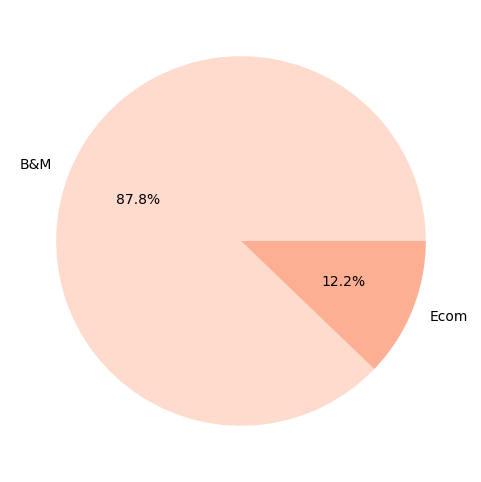

In [23]:
print('Nulls in Ecom_BnM_Indicator are:',df_Transact['Ecom_BnM_Indicator'].isna().sum() ) #No nulls
print(df_Transact['Ecom_BnM_Indicator'].value_counts() )
# No cleaning|

fig,ax=plt.subplots(figsize=(6,6))
colors=sb.color_palette('Reds')
ax.pie(df_Transact['Ecom_BnM_Indicator'].value_counts(),autopct='%0.1f%%',labels=['B&M','Ecom'],colors=colors);

#Most of the presence is in Brick and Mortor 

SalesChannelCode
RS     1232944
TN       58808
EC       57648
MP       57371
EA       24394
NAC        638
Name: count, dtype: int64


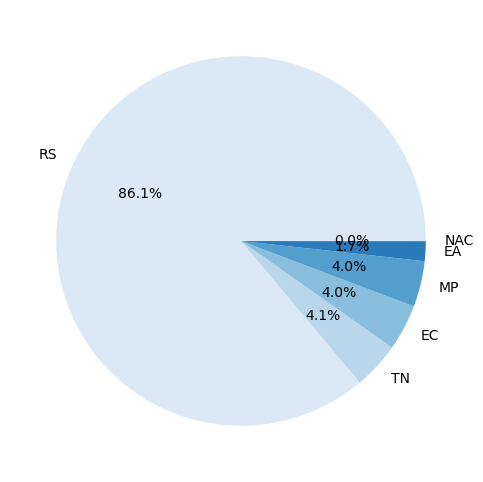

In [32]:
print(df_Transact['SalesChannelCode'].value_counts())
#No processing needed

fig,ax=plt.subplots(figsize=(6,6))
colors=sb.color_palette('Blues')
ax.pie(df_Transact['SalesChannelCode'].value_counts(),autopct='%0.1f%%',labels=['RS','TN','EC','MP','EA','NAC'],colors=colors);

In [13]:
df_Transact['StoreID'].value_counts()
#This has negative values

StoreID
-1.0      107247
 1.0       17460
 31.0      12745
 4.0       12630
 60.0      12114
           ...  
 738.0         1
 766.0         1
 741.0         1
 726.0         1
 223.0         1
Name: count, Length: 358, dtype: int64

In [14]:
df_Transact[df_Transact['StoreID']==-1]
#Rows have sale details , Probably these may be directly shipped from the Warehouse. Keeping those records

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
6860,8JoAoJ8oAo,HAIER REF SBS 570L HRF622KS BS,HAIER REF SBS 570L HRF622KS BS,Refrigerators,Large Appliances,60679.800,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6864,AJGeeAAoHe,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6865,AJGeeAAoHe,Croma Sku 225673,Croma Sku 225673,Phones Mobile Accessories,Communication,610.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6866,AeeHGJ8oAA,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6867,AeeHGJ8oAA,Croma Sku 228819,Croma Sku 228819,Phones Mobile Accessories,Communication,814.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625285,TyGHHeeA1gP,E-Croma Kettle 1.2L 1500W CRAK3057,E-Croma Kettle 1.2L 1500W CRAK3057,Kitchen Appliances,Small Appliances,581.400,1,2021-12-28,NAC,Ecom,-1.0,DEFAULT_NA,NaN,NaN,NaN
1625362,EAoH88AAF8oeMoHFtAR8RVEj877JtGJF,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,TV LCD,Entertainment,19268.820,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625363,GVoRtMjMoJ7AJRHRo88Me81oEtEVMeej,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Cookware,Small Appliances,2446.980,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625364,7eoeV7VGR8o1FFFMM7JVRREjM8jEjHeG,"Apple iPhone 14 Plus (256GB, Purple)","Apple iPhone 14 Plus (256GB, Purple)",Smart Phones (OS Based),Communication,94849.800,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN


In [15]:
df_Transact[df_Transact['StoreCity'].isna()]
#Keep the records with nulls 

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
6860,8JoAoJ8oAo,HAIER REF SBS 570L HRF622KS BS,HAIER REF SBS 570L HRF622KS BS,Refrigerators,Large Appliances,60679.800,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6864,AJGeeAAoHe,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6865,AJGeeAAoHe,Croma Sku 225673,Croma Sku 225673,Phones Mobile Accessories,Communication,610.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6866,AeeHGJ8oAA,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6867,AeeHGJ8oAA,Croma Sku 228819,Croma Sku 228819,Phones Mobile Accessories,Communication,814.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625285,TyGHHeeA1gP,E-Croma Kettle 1.2L 1500W CRAK3057,E-Croma Kettle 1.2L 1500W CRAK3057,Kitchen Appliances,Small Appliances,581.400,1,2021-12-28,NAC,Ecom,-1.0,DEFAULT_NA,NaN,NaN,NaN
1625362,EAoH88AAF8oeMoHFtAR8RVEj877JtGJF,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,TV LCD,Entertainment,19268.820,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625363,GVoRtMjMoJ7AJRHRo88Me81oEtEVMeej,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Cookware,Small Appliances,2446.980,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625364,7eoeV7VGR8o1FFFMM7JVRREjM8jEjHeG,"Apple iPhone 14 Plus (256GB, Purple)","Apple iPhone 14 Plus (256GB, Purple)",Smart Phones (OS Based),Communication,94849.800,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN


In [16]:
df_Transact[df_Transact['StoreCity'].isna()]
#Keeping the nulls as is

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
6860,8JoAoJ8oAo,HAIER REF SBS 570L HRF622KS BS,HAIER REF SBS 570L HRF622KS BS,Refrigerators,Large Appliances,60679.800,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6864,AJGeeAAoHe,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6865,AJGeeAAoHe,Croma Sku 225673,Croma Sku 225673,Phones Mobile Accessories,Communication,610.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6866,AeeHGJ8oAA,Shipping Charges,Shipping Charges,NaN,NaN,34.578,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
6867,AeeHGJ8oAA,Croma Sku 228819,Croma Sku 228819,Phones Mobile Accessories,Communication,814.980,1,2020-08-10,MP,Ecom,-1.0,DEFAULT_MP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625285,TyGHHeeA1gP,E-Croma Kettle 1.2L 1500W CRAK3057,E-Croma Kettle 1.2L 1500W CRAK3057,Kitchen Appliances,Small Appliances,581.400,1,2021-12-28,NAC,Ecom,-1.0,DEFAULT_NA,NaN,NaN,NaN
1625362,EAoH88AAF8oeMoHFtAR8RVEj877JtGJF,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,Hisense A4G 108 cm (43 inch) Full HD LED Smart...,TV LCD,Entertainment,19268.820,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625363,GVoRtMjMoJ7AJRHRo88Me81oEtEVMeej,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Pigeon Ayush 3 Burner Toughened Glass Gas Stov...,Cookware,Small Appliances,2446.980,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN
1625364,7eoeV7VGR8o1FFFMM7JVRREjM8jEjHeG,"Apple iPhone 14 Plus (256GB, Purple)","Apple iPhone 14 Plus (256GB, Purple)",Smart Phones (OS Based),Communication,94849.800,1,2021-12-30,TN,Ecom,-1.0,DEFAULT_TN,NaN,NaN,NaN


In [17]:
df_Transact['StorePincode'].unique()
#This seems to be having extra spaces in the pincodes 

array(['201001', '560043', '110007', '600040', '411018', '600017',
       '110049', '560095', '110017', '400706', '416001', '411013',
       '400063', '122002', '560085', '110075', '122001', '560066',
       '400607', '201308', '560078', '380009', '500409', '500074',
       '411045', '410210', '500062', '400092', '600047', '390008',
       '400049', '400614', '121003', '400022', '560048', '122018',
       '500014', '400601', '302017', '700156', '422005', '411014',
       '580030', '395007', '400030', '201301', '452010', '600054',
       '110005', '110058', '400705', '364001', '641037', '560034',
       '380053', '560038', '600042', '395009', '600096', '600037',
       '500013', '144001', '403501', '570023', '577001', '431136',
       '411057', '400070', '380052', '400067', '395006', '110070',
       '400086', '110001', '500009', '400064', '411038', '411028',
       '110085', nan, '560029', '560054', '395001', '560011', '560035',
       '400078', '431210', '360005', '400101', '411007', 

In [18]:
df_Transact['StorePincode']=df_Transact['StorePincode'].replace(" ","")
df_Transact['StorePincode'].unique()
# Spaces are removed

C:\Users\vinee\AppData\Local\Temp\ipykernel_24352\2451766270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact['StorePincode']=df_Transact['StorePincode'].replace(" ","")


array(['201001', '560043', '110007', '600040', '411018', '600017',
       '110049', '560095', '110017', '400706', '416001', '411013',
       '400063', '122002', '560085', '110075', '122001', '560066',
       '400607', '201308', '560078', '380009', '500409', '500074',
       '411045', '410210', '500062', '400092', '600047', '390008',
       '400049', '400614', '121003', '400022', '560048', '122018',
       '500014', '400601', '302017', '700156', '422005', '411014',
       '580030', '395007', '400030', '201301', '452010', '600054',
       '110005', '110058', '400705', '364001', '641037', '560034',
       '380053', '560038', '600042', '395009', '600096', '600037',
       '500013', '144001', '403501', '570023', '577001', '431136',
       '411057', '400070', '380052', '400067', '395006', '110070',
       '400086', '110001', '500009', '400064', '411038', '411028',
       '110085', nan, '560029', '560054', '395001', '560011', '560035',
       '400078', '431210', '360005', '400101', '411007', 

In [19]:
df_Transact.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.9800,1,2019-01-01,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
6,7jjeRGRotjGtoRFAeFjVVVRRM81GjoGG,JBL Portable BT Speaker Clip3 Blu,JBL Portable BT Speaker Clip3 Blu,Portable BT Speakers/MP3 Players,Entertainment,2335.8000,1,2019-01-01,RS,B&M,14.0,A018,Bangalore,Karnataka,560043
7,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.8000,1,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007
8,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,2Yr OnGo EW-Laptop 70K-1LAC,2Yr OnGo EW-Laptop 70K-1LAC,Mobile Computing,Computers Peripherals,11106.7800,1,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007
9,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,LOGITECH G213 Progidy Gaming Keyboard,LOGITECH G213 Progidy Gaming Keyboard,Input Devices,Computers Peripherals,2670.6048,1,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007


In [37]:
print(df_Transact['MerchClassDescription'].unique())

print(len(df_Transact['MerchClassDescription'].unique()))
#There are 79 Mecrch classes are there

['Smart Phones (OS Based)' 'Portable BT Speakers/MP3 Players'
 'Gaming Laptops' 'Mobile Computing' 'Input Devices'
 'Earphones/Headphones' 'Home Appliances' 'Cookware'
 'Health & Personal Care' 'Washing Machines' 'Air Purifier' 'Phones Fixed'
 'Phones Mobile Accessories' 'Computer Bags' 'Storage Media' 'Microwaves'
 'Refrigerators' 'Croma Bags Plastic & Paper' 'PC Accessories'
 'Lifestyle & Wearables' 'Dishwashers' 'Other Charges' 'TV LCD'
 'Phones Mobile' 'DVD/VCD/Content' 'Consumables' 'Tablets & Detachables'
 'Software' 'GEEK Services' 'Kochar Service' 'Kitchen Appliances'
 'Water Purifiers' 'Speakers' 'DSLR Cameras' 'Air Conditioners'
 'Printers & Office Solutions' 'Gift Card' 'Free Gifts'
 'Imaging Accessories' 'Travel Accessories' 'Networking' 'Digital Cameras'
 'Audio Systems' 'Personal Assistant Speaker' 'Projectors' 'Fans'
 'Desktops' 'Ovens & Cookers' 'Gaming Consoles and Accessories'
 'Onsite Service' 'Entertainment Accessories'
 'Cooling & Heating Appliances' 'Tools' 'MP3 A

In [38]:
#Creating the dictionary for the purpose of assigning the festivals for corresponding festival date.
festivals = {
    pd.to_datetime("2019-11-14"): "Diwali",
    pd.to_datetime("2019-11-15"): "Diwali",
    pd.to_datetime("2020-11-4"): "Diwali",
    pd.to_datetime("2020-11-5"): "Diwali",
    pd.to_datetime("2021-10-25"): "Diwali",
    pd.to_datetime("2021-10-26"): "Diwali",
    pd.to_datetime("2019-12-25"): "Christmas",
    pd.to_datetime("2020-12-25"): "Christmas",
    pd.to_datetime("2021-12-25"): "Christmas",
    pd.to_datetime("2019-08-15"): "Independence Day",
    pd.to_datetime("2020-08-15"): "Independence Day",
    pd.to_datetime("2021-08-15"): "Independence Day",
    pd.to_datetime("2019-01-26"): "Republic Day",
    pd.to_datetime("2020-01-26"): "Republic Day",
    pd.to_datetime("2021-01-26"): "Republic Day",
    pd.to_datetime("2019-11-13"): "Dhanteras",
    pd.to_datetime("2020-11-02"): "Dhanteras",
    pd.to_datetime("2021-10-22"): "Dhanteras",
    pd.to_datetime("2019-10-25"): "Vijaya Dashami",
    pd.to_datetime("2020-10-15"): "Vijaya Dashami",
    pd.to_datetime("2021-10-5"): "Vijaya Dashami",
    pd.to_datetime("2019-06-21"): "Father's Day",
    pd.to_datetime("2020-06-20"): "Father's Day",
    pd.to_datetime("2021-10-19"): "Father's Day",
    pd.to_datetime("2019-10-2"): "Mahatma Gandhi Jayanti",
    pd.to_datetime("2020-10-2"): "Mahatma Gandhi Jayanti",
    pd.to_datetime("2021-10-2"): "Mahatma Gandhi Jayanti",
    pd.to_datetime("2019-12-31"): "New Years Eve",
    pd.to_datetime("2020-12-31"): "New Years Eve",
    pd.to_datetime("2021-12-31"): "New Years Eve",
    pd.to_datetime("2019-03-25"): "Gudi Padwa",
    pd.to_datetime("2020-04-13"): "Gudi Padwa",
    pd.to_datetime("2021-04-2"): "Gudi Padwa"
}

 


Steps to assign the festival as per the order dates:

    1. Get the order date
    2. Check if the order date falls on any festival date
        if yes then assign the corresponding festival
        else assign NoSeason

In [41]:
#Function to Assign the festivals and 'NoSeason' in case of no festival.
def assign_festival(order_date):
    for date_range, festival in festivals.items():
        if date_range <= order_date <= date_range:
            return festival
    return 'NoSeason'

In [43]:
#Applying the function
df_Transact['Season']=pd.DataFrame(df_Transact['OrderDate'].apply(assign_festival))
df_Transact['Season'].value_counts()
#Diwali has the highest order count 

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3103374472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact['Season']=pd.DataFrame(df_Transact['OrderDate'].apply(assign_festival))


Season
NoSeason                  1344548
Diwali                      16407
Dhanteras                   11845
Independence Day            11433
Vijaya Dashami               9341
Republic Day                 8026
Christmas                    7288
New Years Eve                6443
Mahatma Gandhi Jayanti       6422
Father's Day                 5422
Gudi Padwa                   4628
Name: count, dtype: int64

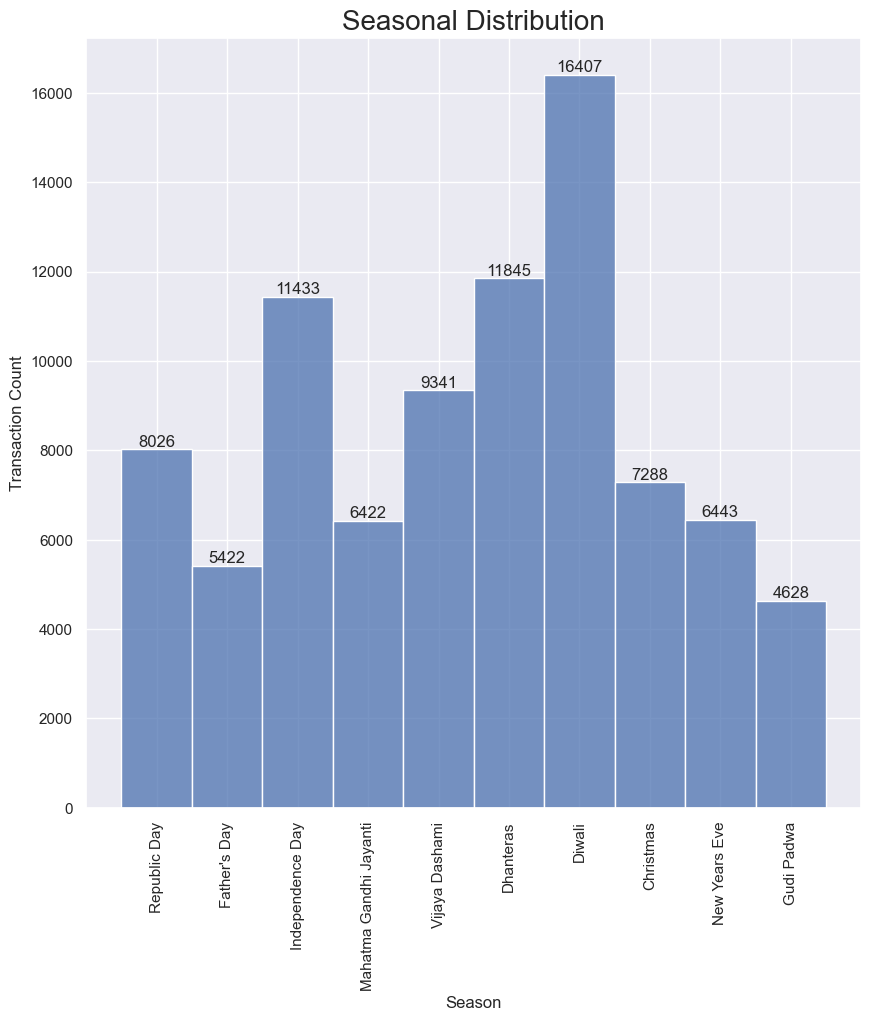

In [47]:
plt.figure(figsize=(10,10))
sb.set_theme()
ax=sb.histplot(data=df_Transact[df_Transact['Season']!='NoSeason'],x='Season',stat='count',);
ax.set_title('Seasonal Distribution',size=20);
plt.xlabel('Season');
plt.ylabel('Transaction Count');
ax.bar_label(ax.containers[1]);
plt.xticks(rotation=90);

# Q. Which Merchant Class is most susceptible to seasonal variations and how much is the variation. Which Merchant Class(es) is/are hardly affected by seasonal variations.

In [48]:
pd.options.display.float_format='{:.2f}'.format #To change the display format of the values

In [49]:
#Here we considered the mean of the sales in order for comparison among the seasonal and non seasonal sales.
df_Transact_grp=df_Transact.groupby(['MerchClassDescription','Season',df_Transact['OrderDate'].dt.year]).agg({'SaleValue':'mean'}).sort_values('SaleValue',ascending=False).reset_index()
df_Transact_grp.rename(columns={'OrderDate':'OrderYear'},inplace=True)
df_Transact_grp

,MerchClassDescription,Season,OrderYear,SaleValue
0,DSLR Cameras,Mahatma Gandhi Jayanti,2021,284576.94
1,Desktops,Diwali,2020,163189.80
2,DSLR Cameras,Republic Day,2021,120801.68
3,DSLR Cameras,Independence Day,2020,110464.06
4,Desktops,Christmas,2021,102349.87
...,...,...,...,...
1747,Free Gifts,Mahatma Gandhi Jayanti,2020,0.01
1748,Brand Free Mobiles,Dhanteras,2021,0.01
1749,Brand Free Mobiles,Christmas,2021,0.01
1750,Free Gifts,Christmas,2020,0.01


Steps:

    1) For every merchclass calculate the Means of seasonal and non seasonal sales from the grouped data
    
    2) Calculate the variability percentage using the formula (festive_avg-non_festive_avg)/(non_festive_avg)*100
    
    3) if the variability is greater than zero, then append the merch class to the seasonal merch class dictionary along with the variabilty 
    
    4) Sort the seasonal mecrch class dictionary based on the variability values in descending order
    
    5) Return the top merch class and the top 10 merch classes as per the variability 

In [60]:
seasonal_MerchClasses={}
unseasonal_MerchClasses={}
for merchClass in df_Transact_grp['MerchClassDescription'].unique():
    avg_non_festiv_sales=df_Transact_grp[(df_Transact_grp['Season']=='NoSeason') & (df_Transact_grp['MerchClassDescription']==merchClass)]['SaleValue'].mean()
    avg_festive_sales=df_Transact_grp[(df_Transact_grp['Season']!='NoSeason') & (df_Transact_grp['MerchClassDescription']==merchClass)]['SaleValue'].mean()
                                       
#     print(f'The average sales for {merchClass} during the non festive season is:{avg_non_festiv_sales}')
#     print(f'The average sales for {merchClass} during the festive season is: {avg_festive_sales}')
          
    variability=(avg_festive_sales-avg_non_festiv_sales)/avg_non_festiv_sales*100
    if variability>0:
        seasonal_MerchClasses.update({merchClass:round(variability,2)})
    else:
        unseasonal_MerchClasses.update({merchClass:round(variability,2)})
#print('The Merch classes with seasonal variability are:',seasonal_MerchClasses)

seasonal_MerchClasses_sorted=list(sorted(seasonal_MerchClasses.items(),key=lambda x:x[1],reverse=True))
unseasonal_MerchClasses_sorted=list(sorted(unseasonal_MerchClasses.items(),key=lambda x:x[1],reverse=True))
print('#'*50)
print(f'The merch class that is highly effected by the festive season is:{seasonal_MerchClasses_sorted[0][0]} with a variation of {seasonal_MerchClasses_sorted[0][1]}%.\n')
print('#'*50)
print('The next top 10 merch classes that are highly effected are:')
for i in range(1,11):
    print(f'{seasonal_MerchClasses_sorted[i][0]} with a variation of {seasonal_MerchClasses_sorted[i][1]}%.')
print('#'*50)
print('\nMerchClasses which are hardly affected are:')
for i in range(0,10):
    print(f'{unseasonal_MerchClasses_sorted[i][0]} with a variation of {unseasonal_MerchClasses_sorted[i][1]}%.')

##################################################
The merch class that is highly effected by the festive season is:Free Gifts with a variation of 676.19%.

##################################################
The next top 10 merch classes that are highly effected are:
Phones Fixed with a variation of 38.32%.
Tools with a variation of 37.24%.
Air Purifier with a variation of 27.41%.
Gift Card with a variation of 27.36%.
Ovens & Cookers with a variation of 24.23%.
Digital Cameras with a variation of 23.99%.
TV Services with a variation of 19.99%.
Phones Mobile with a variation of 19.19%.
Kochar Service with a variation of 17.33%.
Desktops with a variation of 14.02%.
##################################################

MerchClasses which are hardly affected are:
Gaming Laptops with a variation of -0.1%.
Projectors with a variation of nan%.
Mobile Computing with a variation of -3.63%.
Refurbished Phones with a variation of nan%.
Pet Care with a variation of nan%.
Onsite Service with a variat

In [83]:
seasonal_df=pd.DataFrame(seasonal_MerchClasses_sorted,columns=['Season','Variablility'])
seasonal_df.to_excel('seasonal_df.xlsx') #Saving to a file for excel charts
seasonal_df

,Season,Variablility
0,Free Gifts,676.19
1,Phones Fixed,38.32
2,Tools,37.24
3,Air Purifier,27.41
4,Gift Card,27.36
5,Ovens & Cookers,24.23
6,Digital Cameras,23.99
7,TV Services,19.99
8,Phones Mobile,19.19
9,Kochar Service,17.33


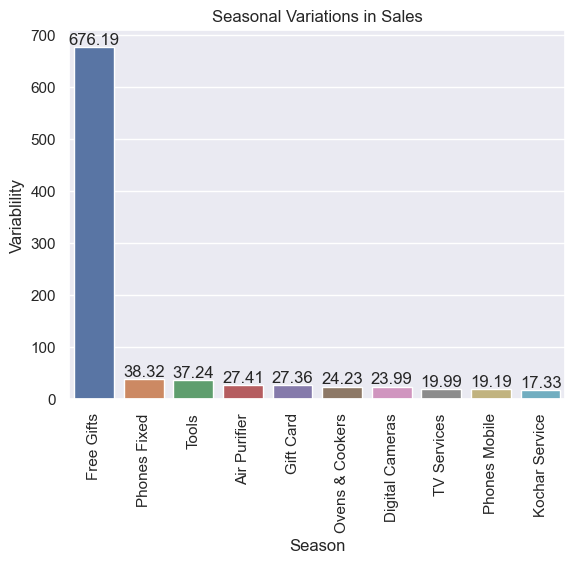

In [87]:
ax1=sb.barplot(x=seasonal_df['Season'][:10],y=seasonal_df['Variablility'][:10]);
plt.xticks(rotation=90);
plt.title('Seasonal Variations in Sales')
ax1.bar_label(ax1.containers[0]);

# 	Q.Sales of which Merchant Class(es) is/are highly affected by Diwali. Quantify sales revenue during Diwali as a percentage of total annual sales revenue for each Merchant Class for each year.

Steps:
    
1. Creating two separate dataframes for Diwali and non Diwali

2. Group the data by order year and merch class to get the sum of the sales

3. Merge the two grouped dataframes on Order Year and MerchClass

4. Calculate Diwali Sales as percent of Total Sales and assign the value to a new column in the Dataframe

In [84]:
pd.set_option('display.max_rows',None)

In [86]:
df_Transact_Diwali=df_Transact[(df_Transact['Season']=='Diwali')]
df_Transact_Others=df_Transact[(df_Transact['Season']!='Diwali')]

MerchClassList=list(df_Transact['MerchClassDescription'].unique())

df_Transact_Diwali_grp=df_Transact_Diwali.groupby([df_Transact['OrderDate'].dt.year,'MerchClassDescription']).agg({'SaleValue':'sum'}).reset_index()
df_Transact_Others_grp=df_Transact_Others.groupby([df_Transact['OrderDate'].dt.year,'MerchClassDescription']).agg({'SaleValue':'sum'}).reset_index()

df_Transact_Diwali_grp.rename(columns={'OrderDate':'OrderYear'},inplace=True)
df_Transact_Others_grp.rename(columns={'OrderDate':'OrderYear'},inplace=True)

df_Transact_Compare=pd.merge(df_Transact_Diwali_grp,df_Transact_Others_grp,on=['OrderYear','MerchClassDescription'],suffixes=('_Diwali','_Others'))    
df_Transact_Compare['Diwali_as_pct_of_total']=(df_Transact_Compare.SaleValue_Diwali*100)/(df_Transact_Compare.SaleValue_Diwali+df_Transact_Compare.SaleValue_Others)
df_Transact_Compare.sort_values(['OrderYear','Diwali_as_pct_of_total'],inplace=True,ascending=False)
print('#'*50)
print('The variabilty among the merch classes per each year are as below:')
df_Transact_Compare

# fig,ax=plt.subplots(figsize=(6,6))
# ax.set_title("Diwali vs Non Diwali Sales Distribution");
# ax.pie([df_Transact_Diwali['SaleValue'].sum(),df_Transact_Others['SaleValue'].sum()],labels=['Diwali','Others'],autopct='%.1f%%');


##################################################
The variabilty among the merch classes per each year are as below:


,OrderYear,MerchClassDescription,SaleValue_Diwali,SaleValue_Others,Diwali_as_pct_of_total
142,2021,Kochar Service,135467.70,5961465.77,2.22
155,2021,Phones Mobile,53619.36,2445248.99,2.15
149,2021,Onsite Service,66082.21,4667115.50,1.40
116,2021,Air Purifier,248657.97,17691326.73,1.39
134,2021,Gaming Laptops,3662149.21,284359212.40,1.27
138,2021,Home Theatre,1293188.97,102674338.56,1.24
121,2021,Consumables,4839.92,399517.68,1.20
165,2021,TV LCD,15594587.67,1317858019.03,1.17
143,2021,Lifestyle & Wearables,1775190.53,151197529.09,1.16
144,2021,Microwaves,850002.04,72528574.26,1.16


In [29]:
df_Transact_Compare.to_excel('Diwali_vs_Other.xlsx')

In [89]:
df_compare_MerchClass=df_Transact_Compare.groupby('MerchClassDescription').agg({'SaleValue_Diwali':'sum','SaleValue_Others':'sum'})
df_compare_MerchClass['Variability']=(df_compare_MerchClass.SaleValue_Diwali*100)/(df_compare_MerchClass.SaleValue_Diwali+df_compare_MerchClass.SaleValue_Others)
df_compare_MerchClass.sort_values('Variability',inplace=True,ascending=False)
print('#'*50)
print('The Merchant classe that are highly affected by Diwali are as given below:')
df_compare_MerchClass.head()

##################################################
The Merchant classe that are highly affected by Diwali are as given below:


,SaleValue_Diwali,SaleValue_Others,Variability
MerchClassDescription,,,
Air Purifier,1037087.69,36627455.83,2.75
Kochar Service,216168.26,11596128.39,1.83
TV LCD,42755959.15,2372398146.84,1.77
Phones Mobile,73895.12,4214181.69,1.72
Onsite Service,152622.48,9330810.55,1.61


In [90]:
#TV,Laptop,Mobile Phones
#list of key words to look for in the descriptions=['TV','Laptop','Mobile Phone']
#df_Transact['MerchCategoryDescription'].unique()

In [32]:
# key_words=['TV','LAPTOP','PHONE']
# list_of_MerchClass=list(df_Transact['MerchClassDescription'].dropna().unique())
# for keyword in key_words:
# #     Target_Merch_Class=\
#     for MerchClass in list_of_MerchClass:
#         if(keyword in MerchClass.upper()):
#             print(keyword, MerchClass.upper())
            


TV TV LCD
TV TV SERVICES
LAPTOP GAMING LAPTOPS
PHONE SMART PHONES (OS BASED)
PHONE EARPHONES/HEADPHONES
PHONE PHONES FIXED
PHONE PHONES MOBILE ACCESSORIES
PHONE PHONES MOBILE
PHONE PHONES MOBILE PROVIDERS
PHONE REFURBISHED PHONES


In [91]:
# a=list(df_Transact['MerchClassDescription'].unique())
# Merch_list=[]
# for i in [0,2,3,22,23]:
#     Merch_list.append(a[i])
# print('The list to look for is as below\n',Merch_list)


    The Merch class list to look for is as below
    ['Smart Phones (OS Based)'
    , 'Gaming Laptops',
    'Mobile Computing',
    'TV LCD',
    'Phones Mobile']

In [92]:
Merch_list=['Smart Phones (OS Based)','Gaming Laptops','Mobile Computing','TV LCD','Phones Mobile']

# •	Product Segmentation: For the Merchant Categories specified below,  classify different brands/products as to whether they belong to Premium (top 33%), Mainstream (middle 33%) and Value (bottom 33%) – based on the price of that product. Accordingly, for each year, tabulate the sales volume and revenue for each product segment (Premium, Mainstream, Value) across the different Merchant Categories. The 3 Merchant Categories to be analysed for this exercise are: TVs, Laptops and Mobile Phones. 

In [93]:
df_Transact['Price']=df_Transact['SaleValue']/df_Transact['OrderedQuantity']

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/2911929089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact['Price']=df_Transact['SaleValue']/df_Transact['OrderedQuantity']


In [94]:
df_Transact['MerchClassDescription'].isin(Merch_list).value_counts()


MerchClassDescription
False    1024405
True      407398
Name: count, dtype: int64

In [95]:
pd.set_option('display.max_rows',50)

Assigning Segment to each product of the requires Merch classes based on their their price range
Steps:

    1)Calculate the percentiles(33,66,100) of the prices of the products
    2)Read the price of the product 
    3)Compare the price with the calculated the percentiles and assign the corresponding Segment
    

In [125]:
def get_segment(Price):
    if Price<=value_percentile:
        return 'Value'
    elif Price<=Medium_percentile:
        return 'Medium'
    else:
        return 'Premium'

In [126]:
df=pd.DataFrame()
for merchclass in Merch_list:
    df_Transact_sub=df_Transact[df_Transact['MerchClassDescription']==merchclass]
    value_percentile=df_Transact_sub['Price'].quantile(.33)
    Medium_percentile=df_Transact_sub['Price'].quantile(.66)
    Premium_percentile=df_Transact_sub['Price'].quantile(1)
    
    df_Transact_sub['Segment']=df_Transact_sub['Price'].apply(get_segment)
    df=pd.concat([df,df_Transact_sub])
    
df

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3875248813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact_sub['Segment']=df_Transact_sub['Price'].apply(get_segment)
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3875248813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Transact_sub['Segment']=df_Transact_sub['Price'].apply(get_segment)
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3875248813.py:8: SettingWithCopyWarning: 
A value is

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Season,Price,Segment
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.98,1,2019-01-01,RS,B&M,79.00,A122,Ghaziabad,Delhi NCR,201001,NoSeason,26518.98,Medium
24,RVMAFteoF87GJ181MJojGRMFJAFEojJG,APPLE iPhone XR 64GB Black,APPLE iPhone XR 64GB Black,Smart Phones (OS Based),Communication,50898.00,1,2019-01-02,RS,B&M,6.00,A007,Pune,Maharashtra,411013,NoSeason,50898.00,Premium
31,8GGJFR8GJ8HFEGtREM888toe7jRF11oe,Samsung Galaxy A10 S Black,Samsung Galaxy A10 S Black,Smart Phones (OS Based),Communication,9178.98,1,2019-01-02,RS,B&M,56.00,A087,New Delhi,Delhi NCR,110075,NoSeason,9178.98,Value
32,8GGJFR8GJ8HFEGtREM888toe7jRF11oe,Samsung Galaxy A10 S 3GB Blue,Samsung Galaxy A10 S 3GB Blue,Smart Phones (OS Based),Communication,9688.98,1,2019-01-02,RS,B&M,56.00,A087,New Delhi,Delhi NCR,110075,NoSeason,9688.98,Value
37,oeEVoFVRoR817MA7JVGtGtj177MtEeVF,APPLE iPhone XR 128GB Black,APPLE iPhone XR 128GB Black,Smart Phones (OS Based),Communication,55998.00,1,2019-01-02,RS,B&M,97.00,A144,Gurugram,Haryana,122001,NoSeason,55998.00,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623495,GotAFJRMEE17A8MEjGo11e111o1HE8FG,"Nokia 105 12ASTB21A01 (4MB, Dual SIM, FM Radio...","Nokia 105 12ASTB21A01 (4MB, Dual SIM, FM Radio...",Phones Mobile,Communication,1477.98,1,2021-10-22,TN,Ecom,-1.00,DEFAULT_TN,NaN,NaN,NaN,Dhanteras,1477.98,Medium
1623496,GotAFJRMEE17A8MEjGo11e111o1HE8FG,"Nokia 105 12ASTB21A01 (4MB, Dual SIM, FM Radio...","Nokia 105 12ASTB21A01 (4MB, Dual SIM, FM Radio...",Phones Mobile,Communication,1477.98,1,2021-10-22,TN,Ecom,-1.00,DEFAULT_TN,NaN,NaN,NaN,Dhanteras,1477.98,Medium
1623710,AVHejeJ1MFeJ7GG88eoAAjjM1JH1AoJE,NOKIA 105 SS (2022) CHARCOAL,NOKIA 105 SS (2022) CHARCOAL,Phones Mobile,Communication,1324.98,1,2021-10-28,RS,B&M,218.00,A225,Hosur,Tamil Nadu,635109,NoSeason,1324.98,Value
1623825,AGGEojeHjEeeGHMoMRojJ8V7VRjRMMoF,"I KALL K777 (32MB, Dual SIM, Rear Camera, Black)","I KALL K777 (32MB, Dual SIM, Rear Camera, Black)",Phones Mobile,Communication,892.50,1,2021-11-01,TN,Ecom,-1.00,DEFAULT_TN,NaN,NaN,NaN,NoSeason,892.50,Value


In [127]:
df_segment=df.groupby([df['OrderDate'].dt.year,'Segment']).agg({'OrderedQuantity':'sum','SaleValue':'sum'}).reset_index()

In [128]:
df_segment.groupby('Segment')['SaleValue'].sum()

Segment
Medium    2861187812.25
Premium   9053482213.01
Value      628919317.18
Name: SaleValue, dtype: float64

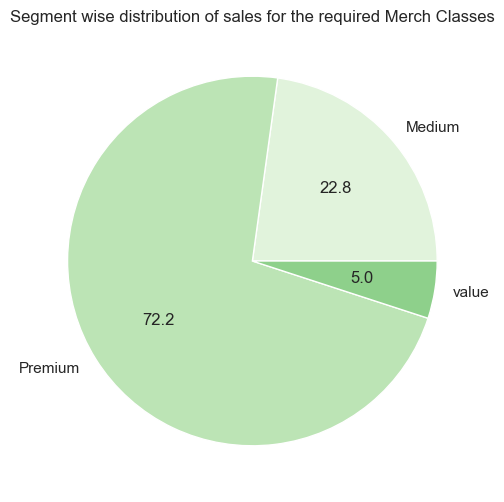

In [130]:
fig,ax=plt.subplots(figsize=(6,6))
colors=sb.color_palette('Greens')
plt.title('Segment wise distribution of sales for the required Merch Classes')
ax.pie(df_segment.groupby('Segment')['SaleValue'].sum(),autopct='%.1f',colors=colors,labels=['Medium','Premium','value']);

In [41]:
pd.set_option('display.max_columns',None)

In [144]:
#df2=pd.DataFrame()
for year in (df['OrderDate'].dt.year.unique()):
    print(f'For year {year}:')
    df_segment_temp=df_segment[df_segment.OrderDate==year]
    total_sales_qty_by_yr=df_segment_temp['OrderedQuantity'].sum()
    total_sales_value_by_yr=df_segment_temp['SaleValue'].sum()
    df_segment_temp['%of Quantity']=df_segment_temp['OrderedQuantity']/total_sales_qty_by_yr*100
    df_segment_temp['%of Value']=df_segment_temp['SaleValue']/total_sales_value_by_yr*100
    print(df_segment_temp,'\n')

For year 2019:
   OrderDate  Segment  OrderedQuantity     SaleValue  %of Quantity  %of Value
0       2019   Medium            24560  538059476.54         33.44      25.19
1       2019  Premium            22535 1487164788.97         30.69      69.63
2       2019    Value            26341  110457898.59         35.87       5.17 

For year 2020:
   OrderDate  Segment  OrderedQuantity     SaleValue  %of Quantity  %of Value
3       2020   Medium            32753  695622404.03         31.72      21.41
4       2020  Premium            36083 2397951118.62         34.95      73.82
5       2020    Value            34408  155004568.53         33.33       4.77 

For year 2021:
   OrderDate  Segment  OrderedQuantity     SaleValue  %of Quantity  %of Value
6       2021   Medium            78723 1627505931.67         34.06      22.73
7       2021  Premium            76710 5168366305.41         33.18      72.19
8       2021    Value            75730  363456850.06         32.76       5.08 



/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3064960528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment_temp['%of Quantity']=df_segment_temp['OrderedQuantity']/total_sales_qty_by_yr*100
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3064960528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment_temp['%of Value']=df_segment_temp['SaleValue']/total_sales_value_by_yr*100
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/3064960528.py:7

# Product Assortment

In [134]:
# Filter the data for Brick and Mortar (B&M) stores
Brick_and_Motors_stores = df_Transact[df_Transact['Ecom_BnM_Indicator'] == 'B&M']
Brick_and_Motors_stores.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Season,Price
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.98,1,2019-01-01,RS,B&M,79.00,A122,Ghaziabad,Delhi NCR,201001,NoSeason,26518.98
6,7jjeRGRotjGtoRFAeFjVVVRRM81GjoGG,JBL Portable BT Speaker Clip3 Blu,JBL Portable BT Speaker Clip3 Blu,Portable BT Speakers/MP3 Players,Entertainment,2335.80,1,2019-01-01,RS,B&M,14.00,A018,Bangalore,Karnataka,560043,NoSeason,2335.80
7,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.80,1,2019-01-01,RS,B&M,24.00,A032,New Delhi,Delhi NCR,110007,NoSeason,66085.80
8,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,2Yr OnGo EW-Laptop 70K-1LAC,2Yr OnGo EW-Laptop 70K-1LAC,Mobile Computing,Computers Peripherals,11106.78,1,2019-01-01,RS,B&M,24.00,A032,New Delhi,Delhi NCR,110007,NoSeason,11106.78
9,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,LOGITECH G213 Progidy Gaming Keyboard,LOGITECH G213 Progidy Gaming Keyboard,Input Devices,Computers Peripherals,2670.60,1,2019-01-01,RS,B&M,24.00,A032,New Delhi,Delhi NCR,110007,NoSeason,2670.60


In [136]:
#Find the maximum date in the dataset
max_date = Brick_and_Motors_stores['OrderDate'].max()
six_months_ago = max_date - pd.DateOffset(months=6)

In [137]:
# Filter data for the most recent 6 months
recent_data = Brick_and_Motors_stores[Brick_and_Motors_stores['OrderDate'] >= six_months_ago]

In [151]:
#for top5 stores
store_sales = recent_data.groupby('StoreID')['SaleValue'].sum()
top_5_stores = store_sales.sort_values(ascending=False).head(5)

top_5_stores =list(top_5_stores.index)
top_5_stores


[1.0, 21.0, 27.0, 7.0, 33.0]

In [143]:
Merch_group_list = recent_data['MerchGroupDescription'].unique()

In [50]:
#empty dataframe
#df2=pd.DataFrame()

In [148]:
df3=pd.DataFrame()
for merchgroup in Merch_group_list:
    df_recent_sub= recent_data[ recent_data['MerchGroupDescription']==merchgroup]
    value_percentile=df_recent_sub['Price'].quantile(.33)
    Medium_percentile=df_recent_sub['Price'].quantile(.66)
    Premium_percentile=df_recent_sub['Price'].quantile(1)
    
    df_recent_sub['Segment']=df_recent_sub['Price'].apply(get_segment)
    df3=pd.concat([df3,df_recent_sub])

df3
#df3 is the data frame of the transactions in the last 6 months

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/1079356612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent_sub['Segment']=df_recent_sub['Price'].apply(get_segment)
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/1079356612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent_sub['Segment']=df_recent_sub['Price'].apply(get_segment)
/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_2052/1079356612.py:8: SettingWithCopyWarning: 
A value is trying 

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Season,Price,Segment
16387,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,Tech Home Visit,Tech Home Visit,GEEK Services,Charge,508.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,508.98,Value
16389,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,PC Setup,PC Setup,GEEK Services,Charge,1018.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,1018.98,Medium
16390,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,PC Setup,PC Setup,GEEK Services,Charge,1018.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,1018.98,Medium
16407,HVHH1GJMteEHe7J11GJGAFAjREGAM7VG,Tech Home Visit,Tech Home Visit,GEEK Services,Charge,508.98,1,2021-06-30,RS,B&M,43.00,A055,New Delhi,Delhi NCR,110001,NoSeason,508.98,Value
16482,F8Ro1oJoFJVG8G71RRHVVMEeEH1MV71F,Free PC Set Up,Free PC Set Up,GEEK Services,Charge,0.01,1,2021-07-02,RS,B&M,143.00,A193,Coimbatore,Tamil Nadu,641035,NoSeason,0.01,Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625197,HEAtAMe18FoHHtEMEtoE8eFjFJjFjGej,Croma Car Charger QP38W CRST38WCHA281201,Croma Car Charger QP38W CRST38WCHA281201,Travel Accessories,Imaging,508.98,1,2021-12-24,RS,B&M,112.00,A160,Bangalore,Karnataka,560064,NoSeason,508.98,Value
1625293,eEFHMHMoRHtAjtH8jtVJAjMVjjFRo887,CROMA dual port USB&Type C adtr EP0147,CROMA dual port USB&Type C adtr EP0147,Travel Accessories,Imaging,2038.98,1,2021-12-28,RS,B&M,81.00,A126,Hyderabad,Telangana,500074,NoSeason,2038.98,Premium
507034,o87ReR8MGGoJG18toHEj18EAF7171oV1,W-Emotorad Electric Cycle TREX+ Red,W-Emotorad Electric Cycle TREX+ Red,Toys,Gaming,40798.98,1,2021-10-14,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,40798.98,Medium
603972,o87ReR8MGGoJG18toHEj18EAF7171oV1,W-Emotorad Electric Cycle TREX+ Red,W-Emotorad Electric Cycle TREX+ Red,Toys,Gaming,40798.98,1,2021-10-15,EA,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,40798.98,Medium


,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Season,Price,Segment
16387,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,Tech Home Visit,Tech Home Visit,GEEK Services,Charge,508.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,508.98,Value
16389,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,PC Setup,PC Setup,GEEK Services,Charge,1018.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,1018.98,Medium
16390,18RVG7FeA7eRFA7ReE77eHMGGJVHttFt,PC Setup,PC Setup,GEEK Services,Charge,1018.98,1,2021-06-30,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,1018.98,Medium
16407,HVHH1GJMteEHe7J11GJGAFAjREGAM7VG,Tech Home Visit,Tech Home Visit,GEEK Services,Charge,508.98,1,2021-06-30,RS,B&M,43.00,A055,New Delhi,Delhi NCR,110001,NoSeason,508.98,Value
16482,F8Ro1oJoFJVG8G71RRHVVMEeEH1MV71F,Free PC Set Up,Free PC Set Up,GEEK Services,Charge,0.01,1,2021-07-02,RS,B&M,143.00,A193,Coimbatore,Tamil Nadu,641035,NoSeason,0.01,Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625197,HEAtAMe18FoHHtEMEtoE8eFjFJjFjGej,Croma Car Charger QP38W CRST38WCHA281201,Croma Car Charger QP38W CRST38WCHA281201,Travel Accessories,Imaging,508.98,1,2021-12-24,RS,B&M,112.00,A160,Bangalore,Karnataka,560064,NoSeason,508.98,Value
1625293,eEFHMHMoRHtAjtH8jtVJAjMVjjFRo887,CROMA dual port USB&Type C adtr EP0147,CROMA dual port USB&Type C adtr EP0147,Travel Accessories,Imaging,2038.98,1,2021-12-28,RS,B&M,81.00,A126,Hyderabad,Telangana,500074,NoSeason,2038.98,Premium
507034,o87ReR8MGGoJG18toHEj18EAF7171oV1,W-Emotorad Electric Cycle TREX+ Red,W-Emotorad Electric Cycle TREX+ Red,Toys,Gaming,40798.98,1,2021-10-14,RS,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,40798.98,Medium
603972,o87ReR8MGGoJG18toHEj18EAF7171oV1,W-Emotorad Electric Cycle TREX+ Red,W-Emotorad Electric Cycle TREX+ Red,Toys,Gaming,40798.98,1,2021-10-15,EA,B&M,16.00,A021,Mumbai,Maharashtra,400050,NoSeason,40798.98,Medium


In [155]:
df3_need_to_stockup = df3[df3["StoreID"].isin(top_5_stores)].groupby(['StoreID','MerchGroupDescription','Segment'])['OrderedQuantity'].sum().reset_index()
df3_need_to_stockup

,StoreID,MerchGroupDescription,Segment,OrderedQuantity
0,1.00,Charge,Medium,195
1,1.00,Charge,Premium,115
2,1.00,Charge,Value,470
3,1.00,Communication,Medium,263
4,1.00,Communication,Premium,290
...,...,...,...,...
107,33.00,Large Appliances,Value,129
108,33.00,Miscellaneous,Value,11
109,33.00,Small Appliances,Medium,102
110,33.00,Small Appliances,Premium,151


In [161]:
for StoreID in top_5_stores:
    print('#'*100)
    for Merch_group in Merch_group_list:
        max_quantity = df3_need_to_stockup[(df3_need_to_stockup['StoreID'] == StoreID) & (df3_need_to_stockup['MerchGroupDescription']== Merch_group)]['OrderedQuantity'].max()
        if max_quantity is not np.nan:
        
            #need to be stocked
            need_to_be_stocked = df3_need_to_stockup[(df3_need_to_stockup['StoreID'] == StoreID) & (df3_need_to_stockup['MerchGroupDescription']== Merch_group) & (df3_need_to_stockup['OrderedQuantity']==max_quantity)]['Segment'].values[0]
            print(f' #For the store {StoreID} in Merch Group {Merch_group} we need to stockup {need_to_be_stocked} segment products')
        

####################################################################################################
 #For the store 1.0 in Merch Group Charge we need to stockup Value segment products
 #For the store 1.0 in Merch Group Computers Peripherals we need to stockup Premium segment products
 #For the store 1.0 in Merch Group Communication we need to stockup Value segment products
 #For the store 1.0 in Merch Group Small Appliances we need to stockup Premium segment products
 #For the store 1.0 in Merch Group Entertainment we need to stockup Premium segment products
 #For the store 1.0 in Merch Group Large Appliances we need to stockup Value segment products
 #For the store 1.0 in Merch Group Miscellaneous we need to stockup Value segment products
 #For the store 1.0 in Merch Group Imaging we need to stockup Premium segment products
####################################################################################################
 #For the store 21.0 in Merch Group Charge we need to stockup

In [163]:
df3_need_to_stockup.to_csv('df2_stockup.csv', index=False) #Exporting for charts in excel/Power BI